# Diagrama del problema
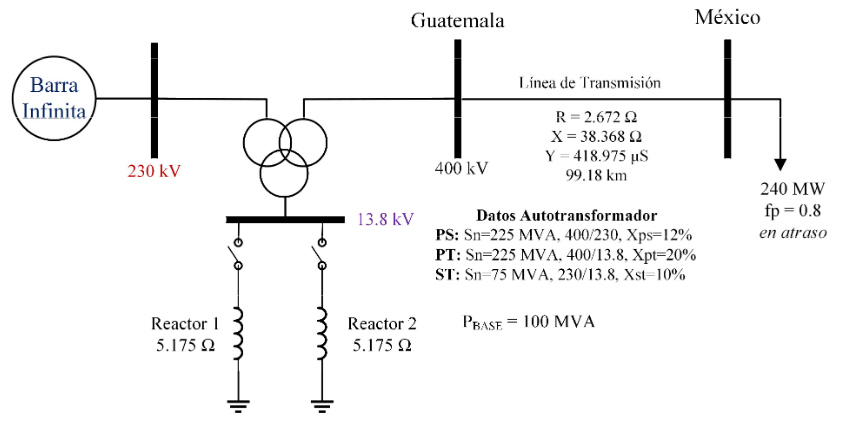

## Dimensionar línea de transmisión
Se debe calcular las distancias $D_1$ y $D_2$ para permitir que cumplan los parámetros indicados de la línea, estos corresponden a
$$
R = 2,672 \Omega \\
X = 38,368 \Omega \\
Y = 418,975 \mu S \\
$$
Esto para 99,18 km

In [9]:
longitud = 99.18 # km
x_l      = 38.368 # Ohm
x_l     /= longitud # Ohm / km
print(x_l, "Ohm/km")

0.38685218794111714 Ohm/km


Conociendo la ecuación
$$
X_L = 2 \pi \cdot 60 \cdot 0,461 \cdot \log \left(\frac{D_{eq}}{D_s} \right) / 1000
$$
Se puede proceder a despejar obteniendo el $D_s$ y $D_{eq}$


$$
\log \left(\frac{D_{eq}}{D_s} \right) = \frac{X_L 1000}{2 \pi \cdot 0,461} \\
D_{eq} = 10^{(X_L 1000)/(2 \pi \cdot 0,461)} \cdot D_s
$$
A partir del $D_{eq}$ obtenido se puede despejar en la siguiente ecuación, para encontrar la distancia entre conductores, asumiendo un espaciamiento igual para los conductores
$$
D_{eq} = \sqrt[3]{D_{12} \cdot D_{23} \cdot D_{31}} \\
D_{12} = D_{23} \\
D_{31} = 2 \cdot D_{12} \\
D_{eq} = \sqrt[3]{(2 \cdot D^3)} \\
D_{eq} = D \cdot \sqrt[3]{(2)} \\
\therefore D = \frac{D_{eq}}{\sqrt[3]{(2)}}
$$

In [10]:
from math import pi, sqrt, acos, degrees, radians, atan, cos, sin
acosd = lambda angle: degrees(acos(angle))
atand = lambda angle: degrees(atan(angle))
mag = lambda rect_v: sqrt(rect_v.real**2 + rect_v.imag)
cosd = lambda angle: cos(radians(angle))
ang = lambda rect_v: atand(rect_v.imag/rect_v.real)
rect = lambda magnitude,angle: complex(magnitude*cos(radians(angle)),magnitude*sin(radians(angle)))
l    = x_l / (2*pi*60) # mH/km
d_s  = 14.204 # mm (tabla de conductores)
d_eq = 10**((1000*x_l)/(2*pi*60*0.461)) * d_s
print(d_eq, "mm")
d    = d_eq / 2**(1/3)
print(d, "mm")
print(d/1000, "m")

2389.727636544939 mm
1896.7280820844574 mm
1.8967280820844574 m


En conclusión, la distancia entre conductores para $D_1$ y $D_2$ corresponde a 1,896 m

Se solicita calcular la capacidad total máxima en MVAR de los reactores a instalar, la corriente de estos se puede obtener mediante las siguientes ecuaciones
$$
I = \frac{V/\sqrt{3}}{X_C} \\
X_C = \frac{1}{Y} \\
Q = V \cdot I \cdot \sqrt{3}
$$

In [11]:
y = 418.975e-6 # Siemens
x_c = longitud/y
print(x_c, "Ohm km")
i = (400/sqrt(3))/(x_c/longitud)
print(i, "A")
q = 400 * i * sqrt(3)
print(q, "MVAR")

236720.5680529865 Ohm km
0.09675813161348938 A
67.03599999999999 MVAR


Analizar el desempeño de la línea de transmisión, considerando la barra de México en 1 pu. Para esto se le solicita calcular
la regulación de tensión modelando la línea como
- Modelo de línea corta
- Modelo de línea media
- Modelo de línea larga

In [12]:
v_base = 400 # kV
print(v_base, "kV")
p_receptor = 240 # MW
fp = 0.8 # atraso
ang_fp = acosd(fp)
p_base = 100 # MVA
print(p_base, "MVA")

400 kV
100 MVA


In [13]:
z_base = v_base**2/p_base
print(z_base, "Ohm")
i_base = (v_base * 1000)/(z_base * sqrt(3))
print(i_base, "A")
i_r = (p_receptor * 1000)/(sqrt(3) * v_base)
i_r /= i_base
print(i_r, "<-", ang_fp, "º pu")
i_r = rect(i_r,-ang_fp)
v_r = 1 # pu ang 0º

1600.0 Ohm
144.33756729740645 A
2.4 <- 36.86989764584401 º pu


In [14]:
z = 2.672 + 38.368j
z /= z_base
print(mag(z),ang(z),"º pu")

0.15486377529945472 86.01627548555673 º pu


### Línea corta

In [15]:
v_s_corta = v_r + i_r * z # pu
print("vs =",v_s_corta,"pu")
prv_corta = (mag(v_s_corta) - mag(v_r))/mag(v_r) * 100
print("%RV =",prv_corta,"%")

vs = (1.0377376+0.0436368j) pu
%RV = 5.855379006159156 %


### Línea media

In [16]:
y_2 = y/2*z_base*1j # pu
print(y_2,"pu")
i_serie = i_r + v_r * y_2 # pu
v_s_media = v_r + i_serie * z # pu
print("vs =",v_s_media,"pu")
v_r0 = v_s_media / (1 + y_2 * z)
prv_media = (mag(v_r0) - mag(v_r))/mag(v_r) * 100
print("%RV =",prv_media,"%")

0.33518j pu
vs = (1.0296999836+0.0441965506j) pu
%RV = 5.903468389315392 %


### Línea larga